Heart Attack Analysis and Prediction

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data

data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
data['Income'].max()

8.0

In [4]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
data.shape

(253680, 22)

In [6]:
# Check for missing values
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Univariate Analysis

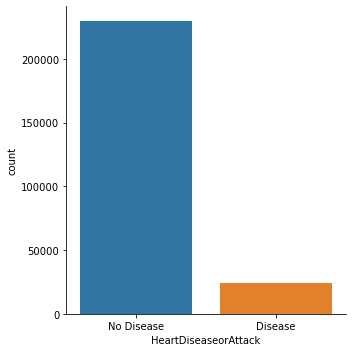

In [8]:
# Explore Target distribution 
sns.catplot(x="HeartDiseaseorAttack", kind="count", data=data)
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

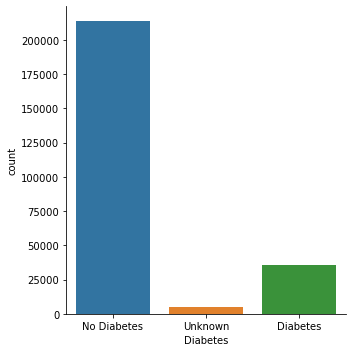

In [9]:
sns.catplot(x="Diabetes", kind="count", data=data)
plt.xticks([0, 1, 2], ['No Diabetes', 'Unknown', 'Diabetes'])
plt.show()

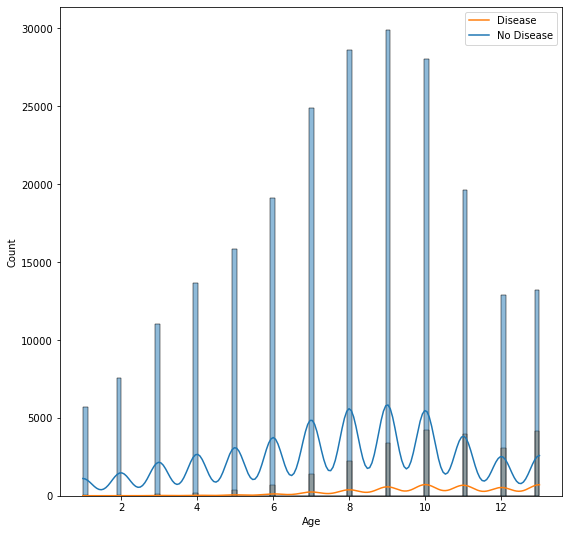

In [10]:
fig = plt.figure(figsize=(9,9))
sns.histplot(data=data, x='Age', hue='HeartDiseaseorAttack', kde=True)
plt.legend(['Disease', 'No Disease'])

plt.show()

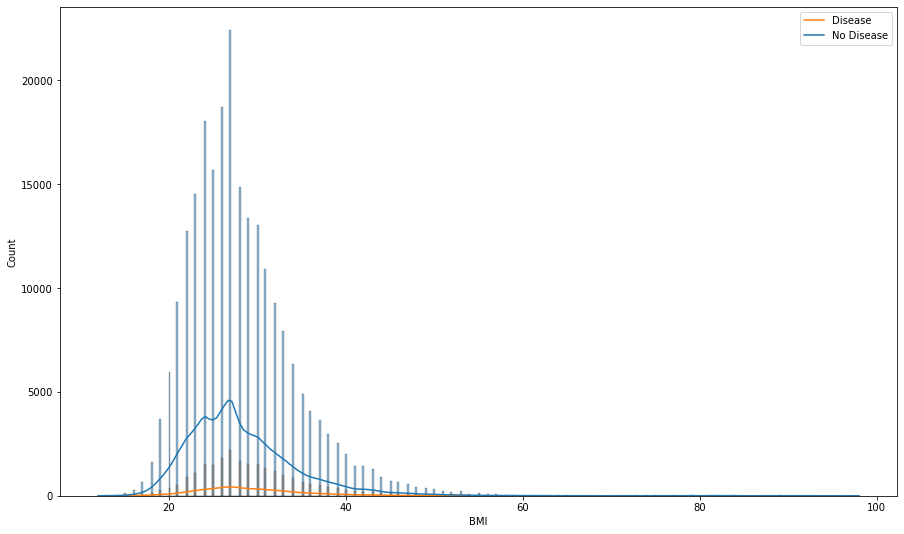

In [11]:
fig = plt.figure(figsize=(15,9))
sns.histplot(data=data, x='BMI', hue='HeartDiseaseorAttack', kde=True)
plt.legend(['Disease', 'No Disease'])

plt.show()

Correlation between variables

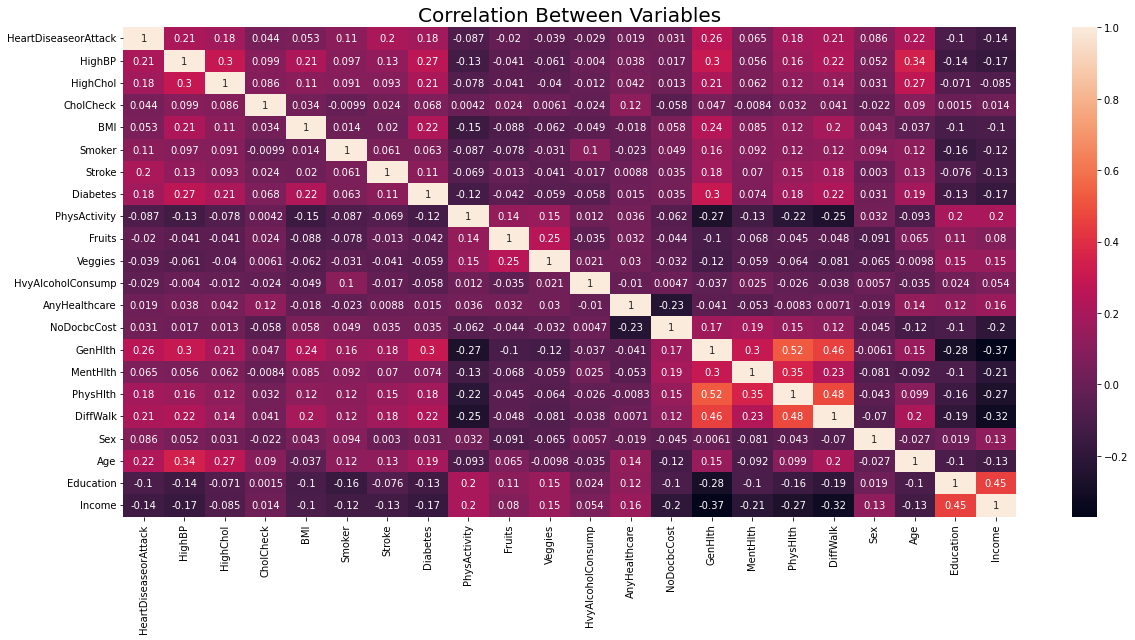

In [12]:
fig = plt.figure(figsize=(20,9))
sns.heatmap(data.corr(), annot=True)

plt.title('Correlation Between Variables', fontsize = 20)

plt.show()

Multivarient Analysis

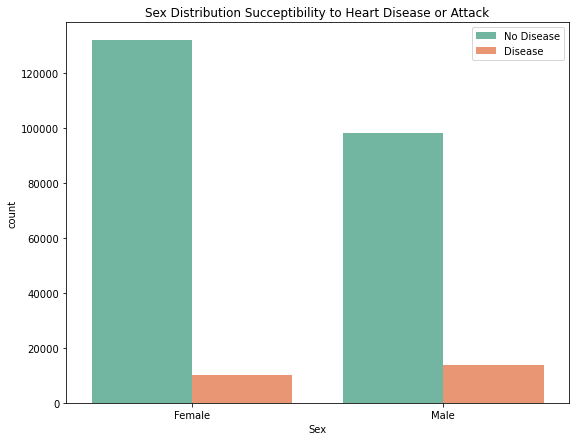

In [13]:
fig = plt.figure(figsize=(9,7))
Gender_succeptibility = sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=data, palette='Set2')
plt.xticks([0, 1], ['Female', 'Male'])


plt.title('Sex Distribution Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

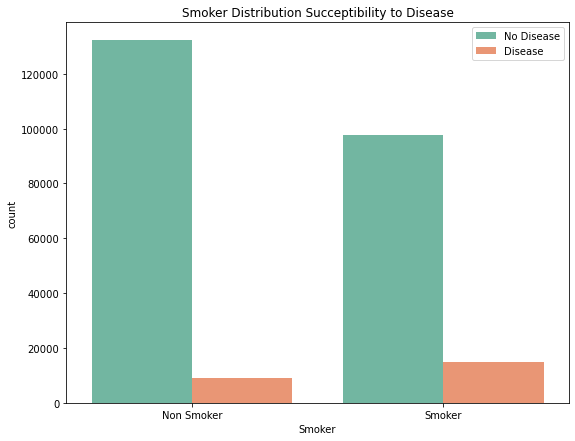

In [14]:
fig = plt.figure(figsize=(9,7))
Smoker_succeptibility = sns.countplot(x='Smoker', hue='HeartDiseaseorAttack', data=data, palette='Set2')
plt.xticks([0, 1], ['Non Smoker', 'Smoker'])


plt.title('Smoker Distribution Succeptibility to Disease')
plt.legend(['No Disease', 'Disease'])


plt.show()

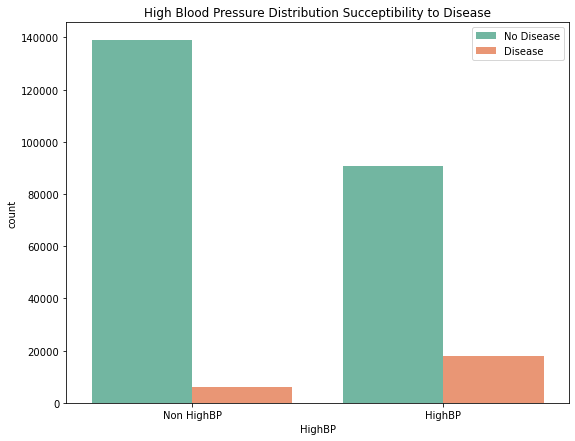

In [15]:
fig = plt.figure(figsize=(9,7))
HighBP_succeptibility = sns.countplot(x='HighBP', hue='HeartDiseaseorAttack', data=data, palette='Set2')
plt.xticks([0, 1], ['Non HighBP', 'HighBP'])


plt.title('High Blood Pressure Distribution Succeptibility to Disease')
plt.legend(['No Disease', 'Disease'])


plt.show()

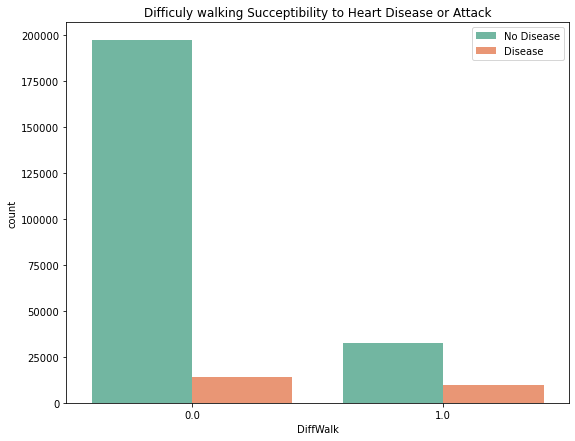

In [16]:
fig = plt.figure(figsize=(9,7))
Difficulty_walking = sns.countplot(x='DiffWalk', hue='HeartDiseaseorAttack', data=data, palette='Set2')



plt.title('Difficuly walking Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

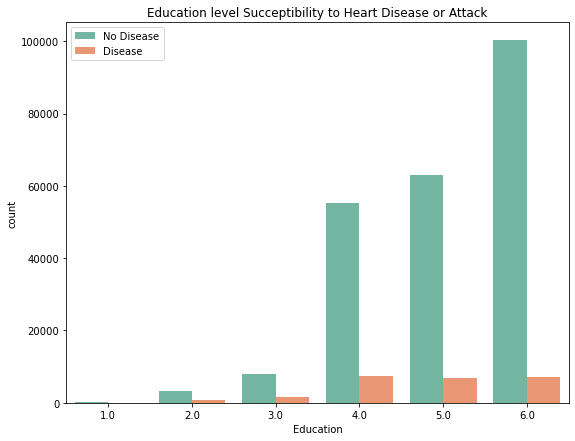

In [17]:
fig = plt.figure(figsize=(9,7))
Education_level = sns.countplot(x='Education', hue='HeartDiseaseorAttack', data=data, palette='Set2')



plt.title('Education level Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

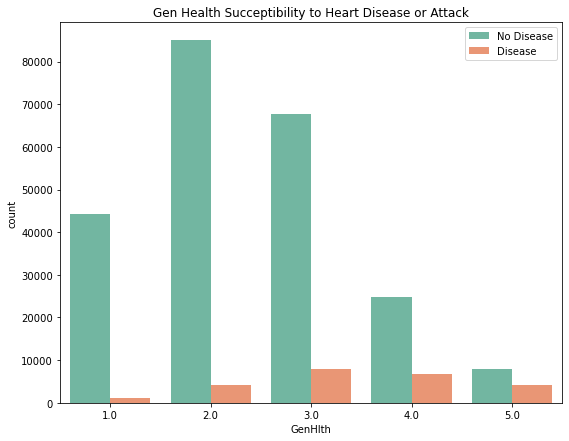

In [18]:
fig = plt.figure(figsize=(9,7))
Gen_health = sns.countplot(x='GenHlth', hue='HeartDiseaseorAttack', data=data, palette='Set2')



plt.title('Gen Health Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

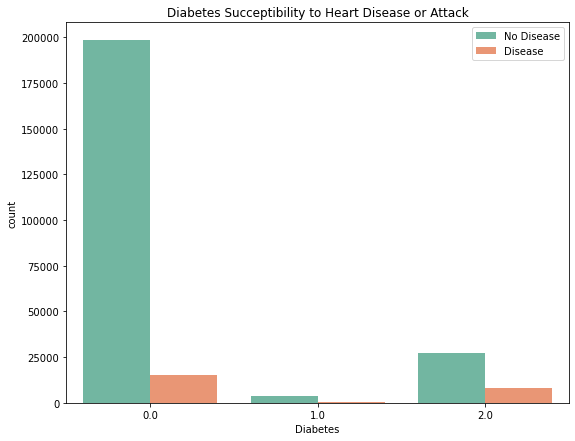

In [19]:
fig = plt.figure(figsize=(9,7))
Diabetes = sns.countplot(x='Diabetes', hue='HeartDiseaseorAttack', data=data, palette='Set2')



plt.title('Diabetes Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

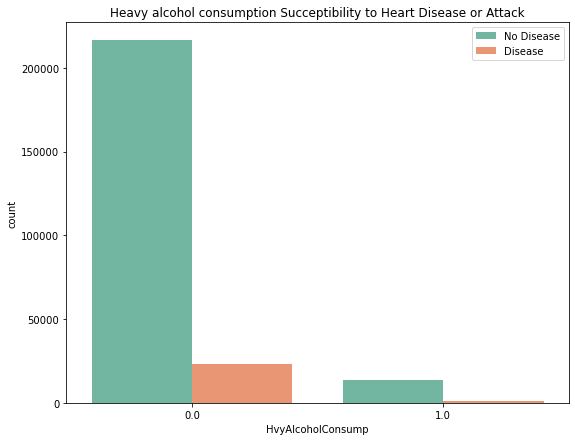

In [20]:
fig = plt.figure(figsize=(9,7))
Heavy_alcohol = sns.countplot(x='HvyAlcoholConsump', hue='HeartDiseaseorAttack', data=data, palette='Set2')



plt.title('Heavy alcohol consumption Succeptibility to Heart Disease or Attack')
plt.legend(['No Disease', 'Disease'])


plt.show()

Data Preprocessing

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [22]:
#to_drop = data[['CholCheck', 'BMI', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Sex']]

In [23]:
#data.drop(to_drop, axis=1, inplace=True)

In [24]:
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

In [25]:
y.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Splitting Dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data['HeartDiseaseorAttack'], random_state=42)

In [28]:
# Balancing the label column using Random over sampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
y_resampled.value_counts()

0.0    183830
1.0    183830
Name: HeartDiseaseorAttack, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.metrics import roc_auc_score

Model Building

Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc.fit(X_resampled, y_resampled)

rfc_pred = rfc.predict(X_test)

In [33]:
print('Accuracy score: ', accuracy_score(y_test, rfc_pred))
print('f1 score : ', f1_score(y_test, rfc_pred))
print('Precision :', precision_score(y_test, rfc_pred))
print('roc auc score: ', roc_auc_score(y_test, rfc_pred))

Accuracy score:  0.8897232734153264
f1 score :  0.2692960689565104
Precision : 0.3582348853370396
roc auc score:  0.58777288346768


K Neigbours

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_resampled, y_resampled)

knc_pred = knc.predict(X_test)

In [35]:
print('Accuracy score: ', accuracy_score(y_test, knc_pred))
print('f1 score : ', f1_score(y_test, knc_pred))
print('Precision :', precision_score(y_test, knc_pred))
print('roc auc score: ', roc_auc_score(y_test, knc_pred))

Accuracy score:  0.828228476821192
f1 score :  0.28990466878513815
Precision : 0.23738991192954365
roc auc score:  0.6239491169322409


Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_resampled, y_resampled)

dtc_pred = dtc.predict(X_test)

In [37]:
print('Accuracy score: ', accuracy_score(y_test, dtc_pred))
print('f1 score : ', f1_score(y_test, dtc_pred))
print('Precision :', precision_score(y_test, dtc_pred))
print('roc auc score: ', roc_auc_score(y_test, dtc_pred))

Accuracy score:  0.8524124881740776
f1 score :  0.23886968896117097
Precision : 0.23225933979047242
roc auc score:  0.5806767758190293


Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_resampled, y_resampled)

gbc_pred = gbc.predict(X_test)

In [39]:
print('Accuracy score: ', accuracy_score(y_test, gbc_pred))
print('f1 score : ', f1_score(y_test, gbc_pred))
print('Precision :', precision_score(y_test, gbc_pred))
print('roc auc score: ', roc_auc_score(y_test, gbc_pred))

Accuracy score:  0.7405392620624409
f1 score :  0.3723657862115
Precision : 0.2411238036430997
roc auc score:  0.7748463276644927


Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_resampled, y_resampled)

gnb_pred = gnb.predict(X_test)

In [41]:
print('Accuracy score: ', accuracy_score(y_test, gnb_pred))
print('f1 score : ', f1_score(y_test, gnb_pred))
print('Precision :', precision_score(y_test, gnb_pred))
print('roc auc score: ', roc_auc_score(y_test, gnb_pred))

Accuracy score:  0.75540050457269
f1 score :  0.3499895244081291
Precision : 0.23342415985467757
roc auc score:  0.7301776582249893


Model Evaluation

In [42]:
# evaluating K Nearest classifiers
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, knc_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90     45957
         1.0       0.24      0.37      0.29      4779

    accuracy                           0.83     50736
   macro avg       0.58      0.62      0.60     50736
weighted avg       0.87      0.83      0.84     50736



In [43]:
#evaluating random forest classifier
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94     45957
         1.0       0.36      0.22      0.27      4779

    accuracy                           0.89     50736
   macro avg       0.64      0.59      0.60     50736
weighted avg       0.87      0.89      0.88     50736



In [44]:
#evaluating naive bayes
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85     45957
         1.0       0.23      0.70      0.35      4779

    accuracy                           0.76     50736
   macro avg       0.60      0.73      0.60     50736
weighted avg       0.89      0.76      0.80     50736



In [45]:
#evaluating gradient boosting classifier
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     45957
         1.0       0.24      0.82      0.37      4779

    accuracy                           0.74     50736
   macro avg       0.61      0.77      0.60     50736
weighted avg       0.91      0.74      0.79     50736



In [46]:
#evaluating decision tree classifier
from sklearn.metrics import completeness_score, classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     45957
         1.0       0.23      0.25      0.24      4779

    accuracy                           0.85     50736
   macro avg       0.58      0.58      0.58     50736
weighted avg       0.86      0.85      0.85     50736



In [47]:
# the k nearest classifier seems to be the best performing model.

In [48]:
import pickle

In [49]:
filename = 'heart_attack.sav'
pickle.dump(knc, open(filename, 'wb'))